In [1]:
import warnings
import scipy as sp
import numpy as np
import porespy as ps
import openpnm as op
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
import skimage as ski

imageSize = 250

primaryImage = np.load('subBeadPackPy250_justSpheres.npy')
secondaryImage = np.load('finalSimFile3D250.npy')

velSecondaryMat = sio.loadmat('velNormSecondary.mat')
velDataNormSecondary = velSecondaryMat['velNorm']

velPrimaryMat = sio.loadmat('velNormPrimary.mat')
velDataNormPrimary = velPrimaryMat['velNorm']

resolution = 16.81E-6 # adding resolution in meters

# Plot pore space

Compare the pore space of both samples

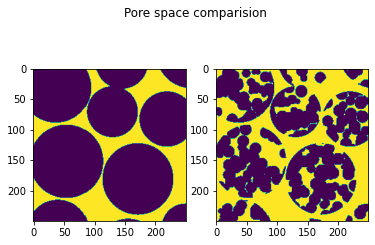

In [3]:
slice = 49

fig, (p1, p2) = plt.subplots(1, 2)

fig.suptitle('Pore space comparision')
p1.imshow(primaryImage[:,:,slice])
p2.imshow(secondaryImage[:,:,slice])

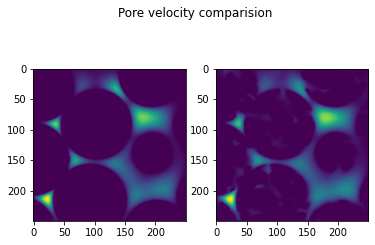

In [4]:
slice = 49

fig, (p1, p2) = plt.subplots(1, 2)

fig.suptitle('Pore velocity comparision')
p1.imshow(velDataNormPrimary[:,:,slice])
p2.imshow(velDataNormSecondary[:,:,slice])

# Filter velocity data
Remove the grains

In [5]:
primaryImage
ps.metrics.porosity(secondaryImage)

0.545888832

In [12]:
# TODO: Filter out grains, but not grain walls, check

goodVelNormPrimary = velDataNormPrimary[primaryImage == 255]
goodVelNormSecondary = velDataNormSecondary[secondaryImage == 1]

No binning, need to think about...

<ipython-input-15-558fdf8eb31d>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


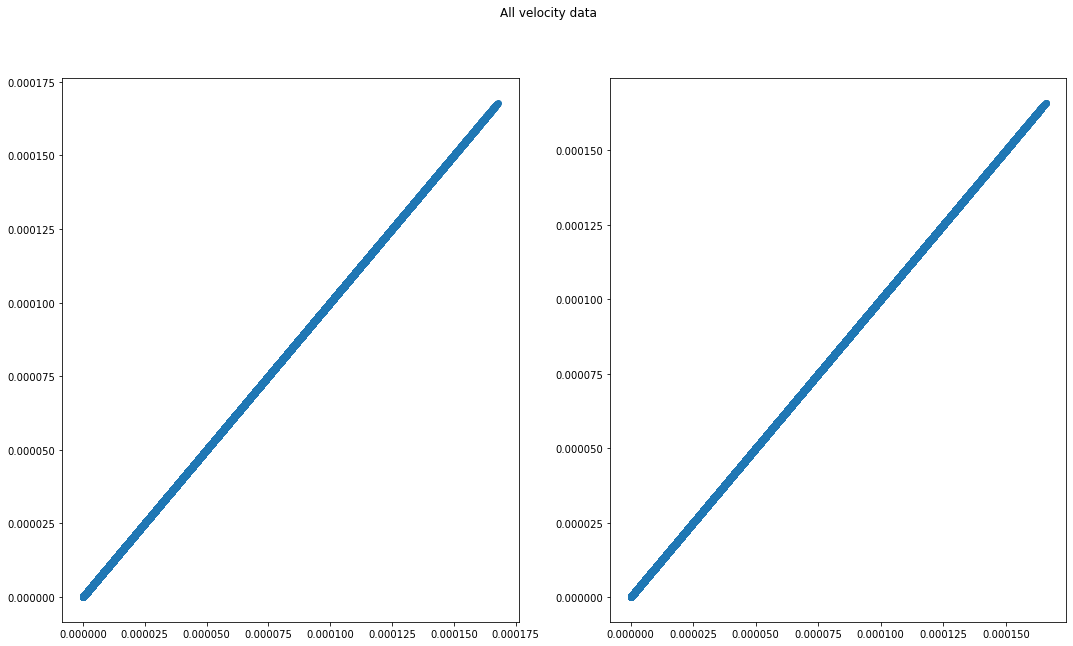

In [15]:
allPrimaryVelocities = np.matrix.flatten(velDataNormPrimary)
allSecondaryVelocities = np.matrix.flatten(velDataNormSecondary)

# fig, axes = plt.subplots(1, 2, figsize=(18, 10))
# fig.suptitle('All velocity data')
# axes[0].scatter(allPrimaryVelocities,allPrimaryVelocities)
# axes[1].scatter(allSecondaryVelocities,allSecondaryVelocities)
#



Plot histogram

Text(0.5, 0, 'Simulated velocity')

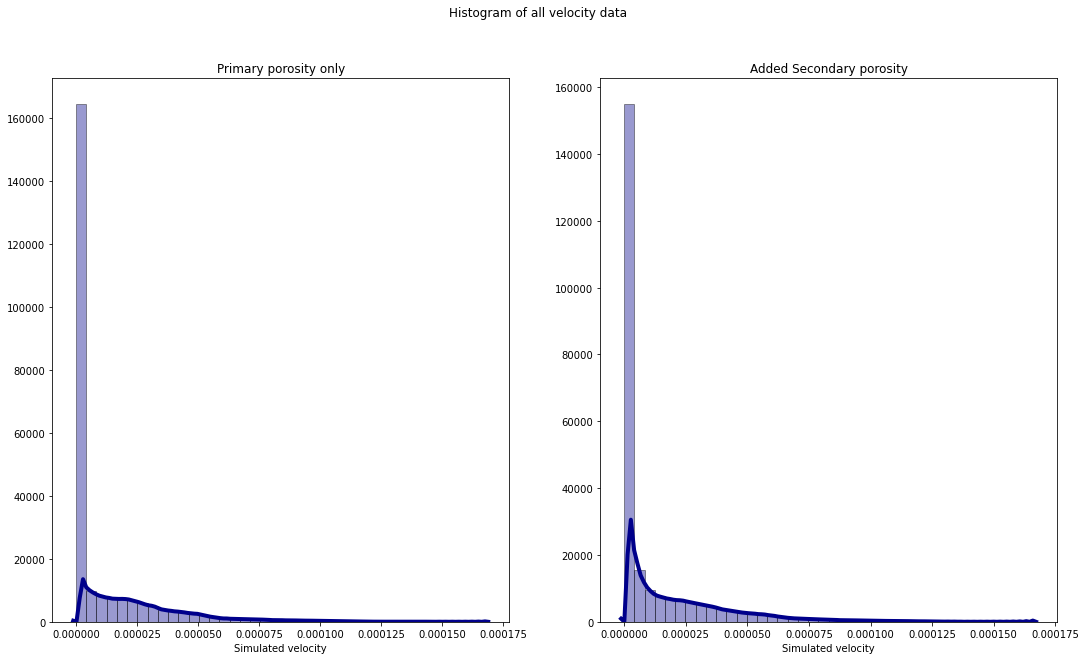

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Histogram of all velocity data')
sns.distplot(goodVelNormPrimary, ax=axes[0], hist=True, kde=True,
             bins=int(40), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
axes[0].set_title('Primary porosity only')
axes[0].set_xlabel('Simulated velocity')

sns.distplot(goodVelNormSecondary, ax=axes[1], hist=True, kde=True,
             bins=int(40), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
axes[1].set_title('Added Secondary porosity')
axes[1].set_xlabel('Simulated velocity')


Remove zero elements of velocity data

In [18]:
primaryNoZeros = goodVelNormPrimary[goodVelNormPrimary != 0]
secondaryNoZeros = goodVelNormSecondary[goodVelNormSecondary != 0]

Text(0.5, 0, 'Simulated velocity')

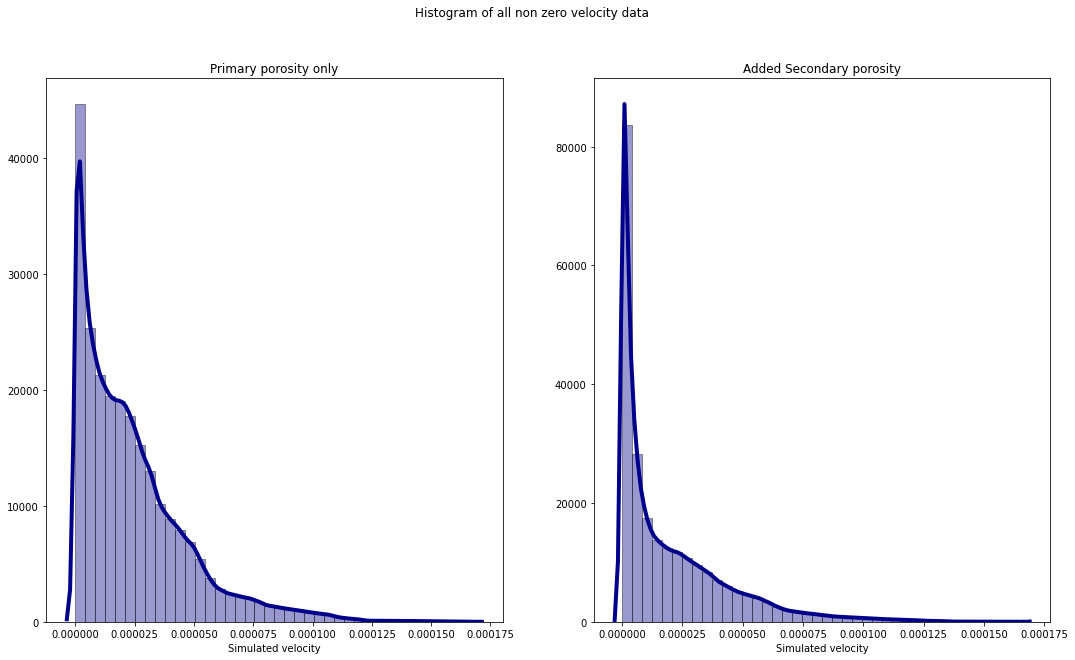

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Histogram of all non zero velocity data')
sns.distplot(primaryNoZeros, ax=axes[0], hist=True, kde=True,
             bins=int(40), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
axes[0].set_title('Primary porosity only')
axes[0].set_xlabel('Simulated velocity')

sns.distplot(secondaryNoZeros, ax=axes[1], hist=True, kde=True,
             bins=int(40), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
axes[1].set_title('Added Secondary porosity')
axes[1].set_xlabel('Simulated velocity')



# Try subtracting velocity values (secondary - primary)

In [21]:
cubeSize = len(secondaryImage)
velDiffImage = np.zeros(np.shape(primaryImage))

for a in range(0, cubeSize):
    for b in range(0, cubeSize):
        for c in range(0, cubeSize):
            velDiffImage[a,b,c] = velDataNormSecondary[a,b,c] - velDataNormPrimary[a,b,c]

Text(0.5, 0, 'Simulated velocity')

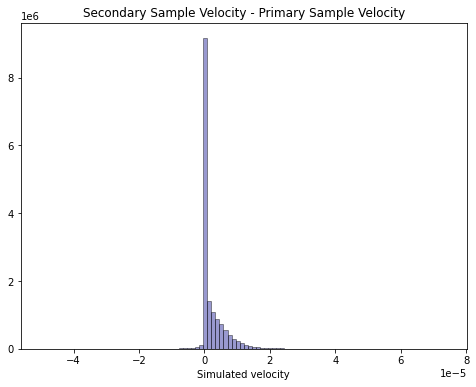

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.distplot(velDiffImage, ax=axes, hist=True, kde=False,
             bins=int(100), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
axes.set_title('Secondary Sample Velocity - Primary Sample Velocity')
axes.set_xlabel('Simulated velocity')

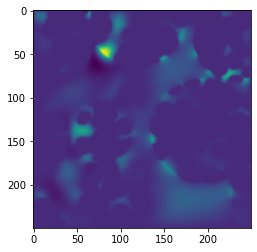

In [23]:
slice = 5
plt.imshow(velDiffImage[:,:,slice])